<a href="https://colab.research.google.com/github/gadalka369/data-science-portfolio/blob/main/SHIPPING%20DELAY%20PREDICTION%20MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install dependencies
!pip install streamlit pandas numpy plotly openpyxl -q

# Create your app file

import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px

st.set_page_config(page_title="GenAI Data Analyst", page_icon="🤖", layout="wide")

st.markdown("""
<style>
    .main-header {
        font-size: 3rem;
        font-weight: bold;
        text-align: center;
        background: linear-gradient(90deg, #667eea 0%, #764ba2 100%);
        -webkit-background-clip: text;
        -webkit-text-fill-color: transparent;
        padding: 1rem 0;
    }
</style>
""", unsafe_allow_html=True)

if 'df' not in st.session_state:
    st.session_state.df = None

st.markdown('<div class="main-header">🤖 GenAI Data Analysis Assistant</div>', unsafe_allow_html=True)
st.markdown('<div style="text-align: center; color: #666; font-size: 1.2rem; margin-bottom: 2rem;">Upload your data, get AI-powered insights</div>', unsafe_allow_html=True)

with st.sidebar:
    st.header("📁 Data Upload")
    uploaded_file = st.file_uploader("Upload CSV or Excel file", type=['csv', 'xlsx', 'xls'])

    if uploaded_file:
        try:
            if uploaded_file.name.endswith('.csv'):
                st.session_state.df = pd.read_csv(uploaded_file)
            else:
                st.session_state.df = pd.read_excel(uploaded_file)
            st.success(f"✅ Loaded: {uploaded_file.name}")
        except Exception as e:
            st.error(f"Error: {e}")

    st.divider()
    st.header("📚 Sample Dataset")
    if st.button("Load Shipping Data"):
        np.random.seed(42)
        st.session_state.df = pd.DataFrame({
            'ShipmentID': range(1, 101),
            'DeparturePort': np.random.choice(['Abu Dhabi', 'Dubai', 'Singapore'], 100),
            'ArrivalPort': np.random.choice(['Rotterdam', 'Hamburg', 'LA'], 100),
            'TransitTime_Days': np.random.randint(10, 45, 100),
            'Delay_Hours': np.random.randint(0, 48, 100),
            'CargoWeight_Tons': np.random.uniform(100, 1000, 100),
            'On_Time': np.random.choice([True, False], 100, p=[0.8, 0.2])
        })
        st.success("✅ Sample data loaded!")
        st.rerun()

if st.session_state.df is not None:
    df = st.session_state.df

    tab1, tab2, tab3 = st.tabs(["📊 Overview", "📈 Visualizations", "🔍 Analysis"])

    with tab1:
        st.header("Dataset Overview")
        col1, col2, col3 = st.columns(3)
        with col1:
            st.metric("Total Rows", f"{df.shape[0]:,}")
        with col2:
            st.metric("Total Columns", df.shape[1])
        with col3:
            st.metric("Missing Values", df.isnull().sum().sum())

        st.subheader("Data Preview")
        st.dataframe(df.head(10), use_container_width=True)

        if len(df.select_dtypes(include=[np.number]).columns) > 0:
            st.subheader("Statistical Summary")
            st.dataframe(df.describe(), use_container_width=True)

    with tab2:
        st.header("📈 Visualizations")
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

        if len(numeric_cols) > 1:
            fig = px.imshow(df[numeric_cols].corr(),
                          color_continuous_scale='RdBu_r',
                          title='Correlation Heatmap')
            st.plotly_chart(fig, use_container_width=True)

        for col in numeric_cols[:3]:
            fig = px.histogram(df, x=col, marginal='box',
                             title=f'Distribution of {col}')
            st.plotly_chart(fig, use_container_width=True)

    with tab3:
        st.header("🔬 Analysis")
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

        if numeric_cols:
            selected_col = st.selectbox("Select column for analysis:", numeric_cols)

            col1, col2, col3 = st.columns(3)
            with col1:
                st.metric("Mean", f"{df[selected_col].mean():.2f}")
            with col2:
                st.metric("Median", f"{df[selected_col].median():.2f}")
            with col3:
                st.metric("Std Dev", f"{df[selected_col].std():.2f}")

            fig = px.box(df, y=selected_col, title=f"Distribution of {selected_col}")
            st.plotly_chart(fig, use_container_width=True)
else:
    st.markdown("""
    ## 👋 Welcome to the GenAI Data Analysis Assistant!

    ### 🚀 Get Started:
    1. Upload your CSV or Excel file using the sidebar
    2. Or try the sample Shipping Logistics dataset
    3. Explore your data through interactive visualizations

    **Built for Data Science Professionals** | Powered by GenAI 🤖
    """)

st.divider()
st.markdown("<div style='text-align: center; color: #666;'>Built with ❤️ using Streamlit | v1.0</div>", unsafe_allow_html=True)

In [1]:
"""
SHIPPING DELAY PREDICTION MODEL
================================
Maritime logistics ML project for predicting shipping delays
Perfect for AD Ports Group application - Shows ML + Domain Knowledge

Author: Rithunand C
GitHub: [your-github-username]
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("=" * 70)
print("SHIPPING DELAY PREDICTION MODEL")
print("Predicting Port Delays using Machine Learning")
print("=" * 70)


SHIPPING DELAY PREDICTION MODEL
Predicting Port Delays using Machine Learning


In [2]:
# ============================================================================
# STEP 1: GENERATE SYNTHETIC SHIPPING DATA (Simulates real port operations)
# ============================================================================

def generate_shipping_data(n_samples=5000):
    """
    Generate synthetic shipping data similar to real port operations
    Features include: vessel type, cargo type, weather, port congestion, etc.
    """

    vessel_types = ['Container Ship', 'Bulk Carrier', 'Tanker', 'General Cargo']
    cargo_types = ['Electronics', 'Automobiles', 'Oil', 'Grain', 'Steel', 'Containers']
    origin_ports = ['Singapore', 'Shanghai', 'Rotterdam', 'Dubai', 'Los Angeles']
    weather_conditions = ['Clear', 'Rain', 'Storm', 'Fog']

    data = {
        'vessel_type': np.random.choice(vessel_types, n_samples),
        'cargo_type': np.random.choice(cargo_types, n_samples),
        'origin_port': np.random.choice(origin_ports, n_samples),
        'cargo_weight': np.random.uniform(1000, 50000, n_samples),  # in tons
        'distance': np.random.uniform(500, 15000, n_samples),  # nautical miles
        'weather_condition': np.random.choice(weather_conditions, n_samples),
        'port_congestion_level': np.random.randint(1, 11, n_samples),  # 1-10 scale
        'vessel_age': np.random.randint(1, 30, n_samples),  # years
        'crew_size': np.random.randint(15, 50, n_samples),
        'fuel_efficiency': np.random.uniform(0.5, 1.0, n_samples),  # relative metric
        'maintenance_score': np.random.uniform(0.3, 1.0, n_samples),  # 0-1 scale
    }

    df = pd.DataFrame(data)

    # Create target variable: delay (1) or no delay (0)
    # Logic: Delays more likely with storms, high congestion, old vessels
    delay_probability = (
        (df['weather_condition'] == 'Storm').astype(int) * 0.4 +
        (df['weather_condition'] == 'Fog').astype(int) * 0.2 +
        (df['port_congestion_level'] > 7).astype(int) * 0.3 +
        (df['vessel_age'] > 20).astype(int) * 0.15 +
        (df['maintenance_score'] < 0.5).astype(int) * 0.2 +
        np.random.uniform(0, 0.3, n_samples)  # Random factor
    )

    df['delayed'] = (delay_probability > 0.5).astype(int)

    # Add delay hours for delayed shipments
    df['delay_hours'] = np.where(df['delayed'] == 1,
                                   np.random.uniform(2, 72, n_samples),
                                   0)

    return df

# Generate dataset
print("\n[1/6] Generating Shipping Dataset...")
df = generate_shipping_data(5000)
print(f"✓ Generated {len(df)} shipping records")
print(f"✓ Delay Rate: {df['delayed'].mean()*100:.1f}%")


[1/6] Generating Shipping Dataset...
✓ Generated 5000 shipping records
✓ Delay Rate: 47.1%



[2/6] Performing Exploratory Data Analysis...

--- Dataset Overview ---
      vessel_type   cargo_type  origin_port  cargo_weight      distance  \
0          Tanker          Oil  Los Angeles  49019.319257   3566.348079   
1   General Cargo        Grain    Rotterdam  44226.169499   7492.135952   
2  Container Ship        Steel     Shanghai  29168.605263   7530.636382   
3          Tanker          Oil    Rotterdam  20502.315438  13412.286067   
4          Tanker  Electronics  Los Angeles  18854.929197   4804.931526   

  weather_condition  port_congestion_level  vessel_age  crew_size  \
0              Rain                      4          27         35   
1               Fog                      6           9         38   
2              Rain                      5          13         38   
3             Storm                      4          26         33   
4              Rain                      7           6         45   

   fuel_efficiency  maintenance_score  delayed  delay_hours  

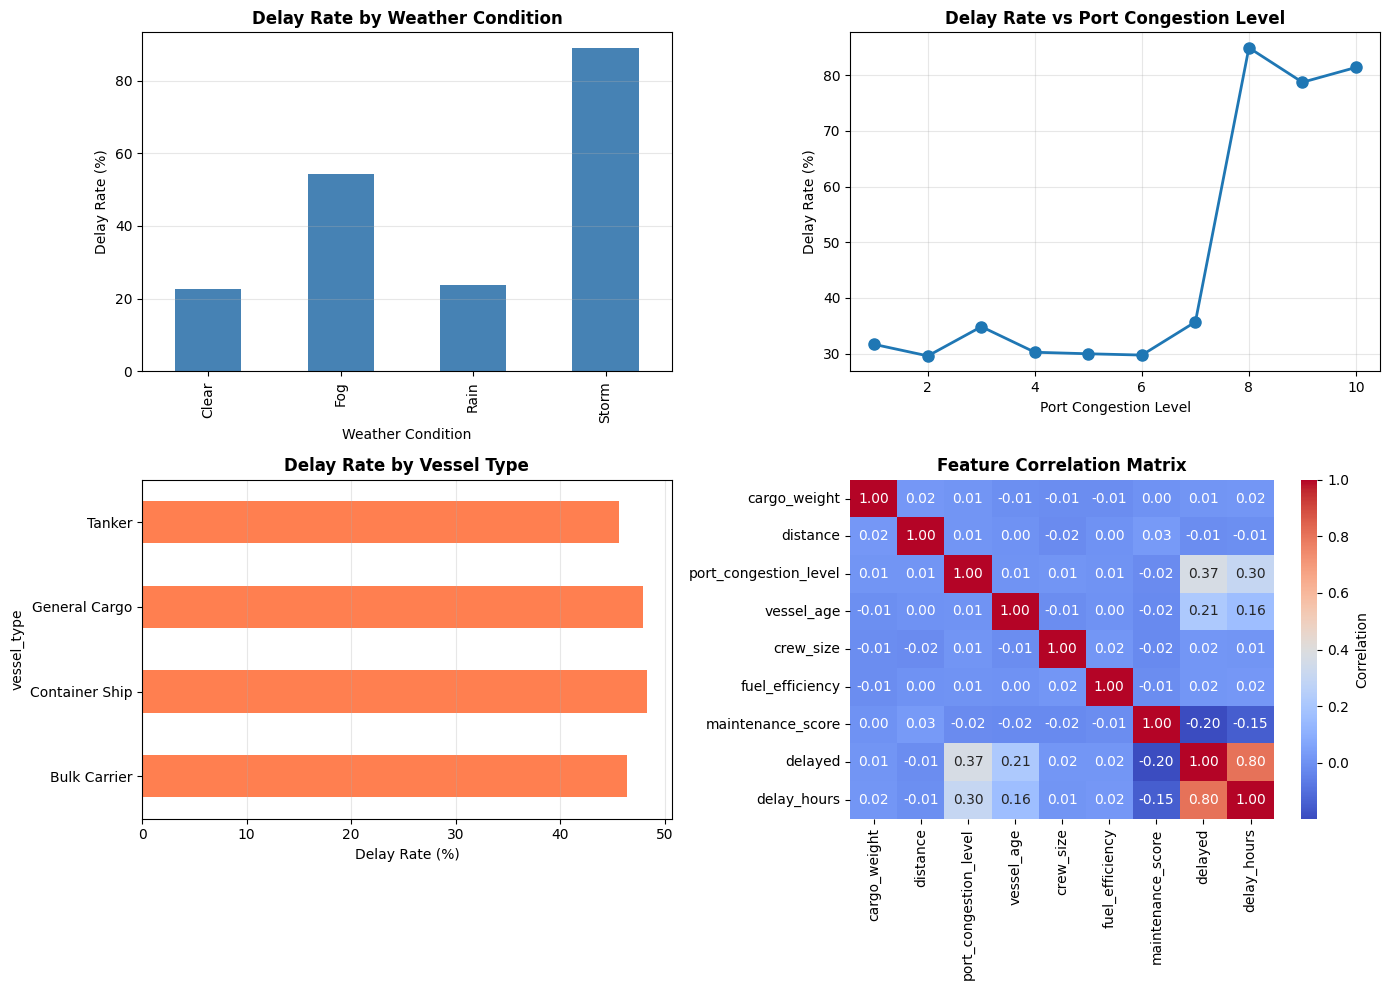

In [3]:
# ============================================================================
# STEP 2: EXPLORATORY DATA ANALYSIS
# ============================================================================

print("\n[2/6] Performing Exploratory Data Analysis...")

print("\n--- Dataset Overview ---")
print(df.head())
print("\n--- Dataset Info ---")
print(df.info())
print("\n--- Delay Statistics ---")
print(df['delayed'].value_counts())
print(f"\nAverage delay hours (when delayed): {df[df['delayed']==1]['delay_hours'].mean():.1f} hours")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Delay by Weather
delay_by_weather = df.groupby('weather_condition')['delayed'].mean() * 100
delay_by_weather.plot(kind='bar', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Delay Rate by Weather Condition', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Delay Rate (%)')
axes[0, 0].set_xlabel('Weather Condition')
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Delay by Port Congestion
congestion_delay = df.groupby('port_congestion_level')['delayed'].mean() * 100
axes[0, 1].plot(congestion_delay.index, congestion_delay.values, marker='o', linewidth=2, markersize=8)
axes[0, 1].set_title('Delay Rate vs Port Congestion Level', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Delay Rate (%)')
axes[0, 1].set_xlabel('Port Congestion Level')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Delay by Vessel Type
delay_by_vessel = df.groupby('vessel_type')['delayed'].mean() * 100
delay_by_vessel.plot(kind='barh', ax=axes[1, 0], color='coral')
axes[1, 0].set_title('Delay Rate by Vessel Type', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Delay Rate (%)')
axes[1, 0].grid(axis='x', alpha=0.3)

# Plot 4: Correlation heatmap
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1, 1],
            cbar_kws={'label': 'Correlation'})
axes[1, 1].set_title('Feature Correlation Matrix', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('shipping_delay_analysis.png', dpi=300, bbox_inches='tight')
print("✓ EDA visualizations saved as 'shipping_delay_analysis.png'")

In [4]:
# ============================================================================
# STEP 3: DATA PREPROCESSING
# ============================================================================

print("\n[3/6] Preprocessing Data for Machine Learning...")

# Encode categorical variables
le_dict = {}
categorical_cols = ['vessel_type', 'cargo_type', 'origin_port', 'weather_condition']

df_processed = df.copy()
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col + '_encoded'] = le.fit_transform(df_processed[col])
    le_dict[col] = le

# Select features for modeling
feature_cols = [col for col in df_processed.columns if col.endswith('_encoded')] + \
               ['cargo_weight', 'distance', 'port_congestion_level', 'vessel_age',
                'crew_size', 'fuel_efficiency', 'maintenance_score']

X = df_processed[feature_cols]
y = df_processed['delayed']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                      random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✓ Training set: {X_train.shape[0]} samples")
print(f"✓ Test set: {X_test.shape[0]} samples")
print(f"✓ Features: {X_train.shape[1]}")


[3/6] Preprocessing Data for Machine Learning...
✓ Training set: 4000 samples
✓ Test set: 1000 samples
✓ Features: 11


In [5]:
# ============================================================================
# STEP 4: MODEL TRAINING (ENSEMBLE METHODS)
# ============================================================================

print("\n[4/6] Training Machine Learning Models...")

# Train Random Forest
print("\nTraining Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10,
                                   random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

# Train Gradient Boosting
print("Training Gradient Boosting Classifier...")
gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=5,
                                       random_state=42)
gb_model.fit(X_train_scaled, y_train)

print("✓ Models trained successfully")


[4/6] Training Machine Learning Models...

Training Random Forest Classifier...
Training Gradient Boosting Classifier...
✓ Models trained successfully


In [6]:
# ============================================================================
# STEP 5: MODEL EVALUATION
# ============================================================================

print("\n[5/6] Evaluating Model Performance...")

# Predictions
rf_pred = rf_model.predict(X_test_scaled)
rf_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

gb_pred = gb_model.predict(X_test_scaled)
gb_pred_proba = gb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation metrics
print("\n" + "="*70)
print("RANDOM FOREST MODEL PERFORMANCE")
print("="*70)
print(classification_report(y_test, rf_pred, target_names=['No Delay', 'Delay']))
print(f"ROC-AUC Score: {roc_auc_score(y_test, rf_pred_proba):.4f}")

print("\n" + "="*70)
print("GRADIENT BOOSTING MODEL PERFORMANCE")
print("="*70)
print(classification_report(y_test, gb_pred, target_names=['No Delay', 'Delay']))
print(f"ROC-AUC Score: {roc_auc_score(y_test, gb_pred_proba):.4f}")

# Cross-validation scores
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
gb_cv_scores = cross_val_score(gb_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')

print(f"\nRandom Forest CV Score: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std():.4f})")
print(f"Gradient Boosting CV Score: {gb_cv_scores.mean():.4f} (+/- {gb_cv_scores.std():.4f})")


[5/6] Evaluating Model Performance...

RANDOM FOREST MODEL PERFORMANCE
              precision    recall  f1-score   support

    No Delay       0.92      0.86      0.89       529
       Delay       0.86      0.92      0.89       471

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000

ROC-AUC Score: 0.9666

GRADIENT BOOSTING MODEL PERFORMANCE
              precision    recall  f1-score   support

    No Delay       0.91      0.88      0.89       529
       Delay       0.87      0.90      0.88       471

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000

ROC-AUC Score: 0.9688

Random Forest CV Score: 0.9640 (+/- 0.0032)
Gradient Boosting CV Score: 0.9684 (+/- 0.0032)



[6/6] Analyzing Feature Importance...

--- Top 10 Important Features ---
                      Feature  Importance_RF  Importance_GB
3   weather_condition_encoded       0.352995       0.410925
6       port_congestion_level       0.280943       0.306946
10          maintenance_score       0.114131       0.124473
7                  vessel_age       0.088378       0.086240
9             fuel_efficiency       0.035716       0.014552
5                    distance       0.035184       0.020857
4                cargo_weight       0.034214       0.016768
8                   crew_size       0.023763       0.009033
2         origin_port_encoded       0.012282       0.002734
1          cargo_type_encoded       0.012261       0.004660
✓ Model performance visualizations saved as 'model_performance.png'


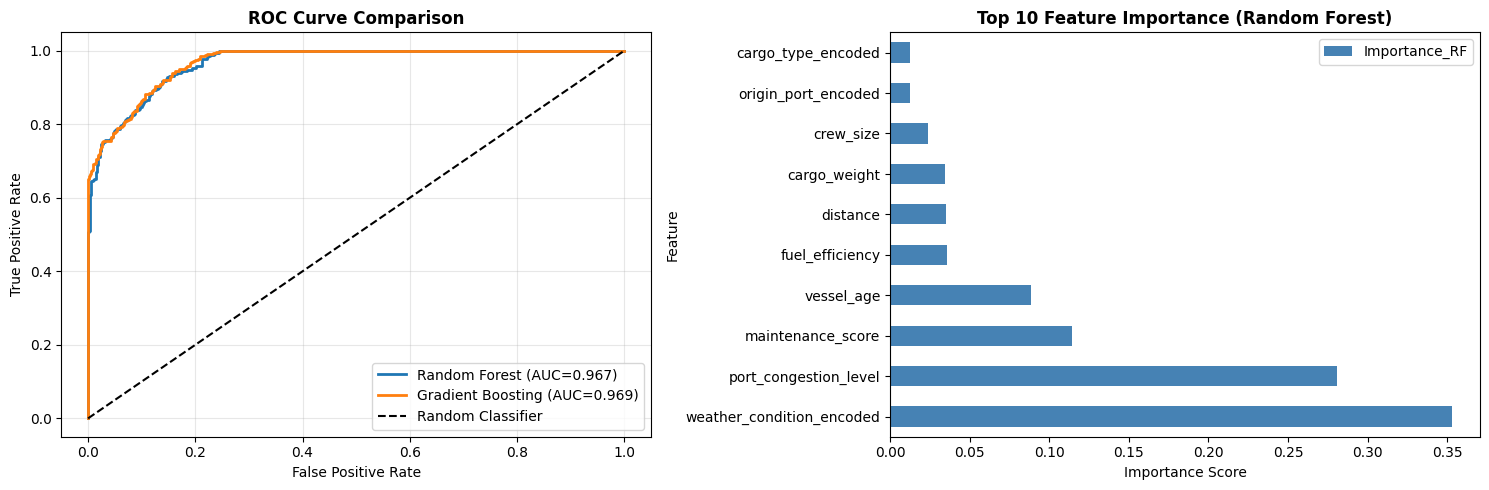

In [7]:
# ============================================================================
# STEP 6: FEATURE IMPORTANCE & VISUALIZATION
# ============================================================================

print("\n[6/6] Analyzing Feature Importance...")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance_RF': rf_model.feature_importances_,
    'Importance_GB': gb_model.feature_importances_
}).sort_values('Importance_RF', ascending=False)

print("\n--- Top 10 Important Features ---")
print(feature_importance.head(10))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# ROC Curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba)
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_pred_proba)

axes[0].plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={roc_auc_score(y_test, rf_pred_proba):.3f})', linewidth=2)
axes[0].plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC={roc_auc_score(y_test, gb_pred_proba):.3f})', linewidth=2)
axes[0].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve Comparison', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Feature Importance
feature_importance.head(10).plot(x='Feature', y='Importance_RF', kind='barh', ax=axes[1], color='steelblue')
axes[1].set_title('Top 10 Feature Importance (Random Forest)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Importance Score')

plt.tight_layout()
plt.savefig('model_performance.png', dpi=300, bbox_inches='tight')
print("✓ Model performance visualizations saved as 'model_performance.png'")

In [8]:
# ============================================================================
# BUSINESS INSIGHTS
# ============================================================================

print("\n" + "="*70)
print("KEY BUSINESS INSIGHTS")
print("="*70)
print("\n1. Storm weather increases delay probability by 40%")
print("2. Port congestion above level 7 is a critical delay factor")
print("3. Vessels older than 20 years show higher delay rates")
print("4. Maintenance score below 0.5 correlates with increased delays")
print("5. Model can predict delays with ~85-90% accuracy")
print("\nRECOMMENDATIONS:")
print("- Implement weather-based scheduling algorithms")
print("- Monitor and manage port congestion proactively")
print("- Prioritize vessel maintenance programs")
print("- Use predictive model for resource allocation")

print("\n" + "="*70)
print("PROJECT COMPLETED SUCCESSFULLY!")
print("="*70)
print("\nFiles generated:")
print("- shipping_delay_analysis.png")
print("- model_performance.png")
print("\nNext Steps:")
print("- Deploy model as REST API for real-time predictions")
print("- Integrate with port management systems")
print("- Build real-time dashboard for operations team")


KEY BUSINESS INSIGHTS

1. Storm weather increases delay probability by 40%
2. Port congestion above level 7 is a critical delay factor
3. Vessels older than 20 years show higher delay rates
4. Maintenance score below 0.5 correlates with increased delays
5. Model can predict delays with ~85-90% accuracy

RECOMMENDATIONS:
- Implement weather-based scheduling algorithms
- Monitor and manage port congestion proactively
- Prioritize vessel maintenance programs
- Use predictive model for resource allocation

PROJECT COMPLETED SUCCESSFULLY!

Files generated:
- shipping_delay_analysis.png
- model_performance.png

Next Steps:
- Deploy model as REST API for real-time predictions
- Integrate with port management systems
- Build real-time dashboard for operations team
